In [65]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('D:\Data sets\perf.csv')

In [62]:
data

,id,lag,emp_eoy,pos_eoy,type,grade,dept,educ,emp_eval,pos_eval,score
0,1,-7,7.29,7.29,1,8,40,13,7.12,7.12,184
1,2,9,2.92,2.12,1,13,55,13,1.82,1.02,155
2,3,21,0.77,0.77,0,13,55,16,0.31,0.31,132
3,4,-7,0.80,0.80,0,4,55,13,0.23,0.23,118
4,5,15,13.78,4.70,1,2,41,12,13.16,4.07,102
...,...,...,...,...,...,...,...,...,...,...,...
139,140,21,2.74,2.74,1,8,62,16,2.06,2.06,171
140,141,35,7.52,5.32,1,8,65,16,7.33,5.12,143
141,142,3,0.65,0.65,0,8,74,14,0.26,0.26,90
142,143,24,0.92,0.92,0,3,41,12,0.31,0.31,115


In [63]:
data.isna().sum()

id          0
lag         0
emp_eoy     0
pos_eoy     0
type        0
grade       0
dept        0
educ        0
emp_eval    0
pos_eval    0
score       0
dtype: int64

In [67]:
x = data.drop(['score'], axis=1)
y = data['score']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [74]:
model = KNeighborsRegressor(n_neighbors=4)

In [75]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [76]:
model.score(x_train,y_train)

0.40842732317072006

In [77]:
model.score(x_test, y_test)

-0.6155833749694373

In [81]:

mse = []
r2Score = []

for k in range(1,20):
    reg_knn = KNeighborsRegressor(n_neighbors=k)
    reg_knn.fit(x_train,y_train)
    pred = reg_knn.predict(x_test)
    mse.append(mean_squared_error(y_test,pred))
    r2Score.append(r2_score(y_test,pred))

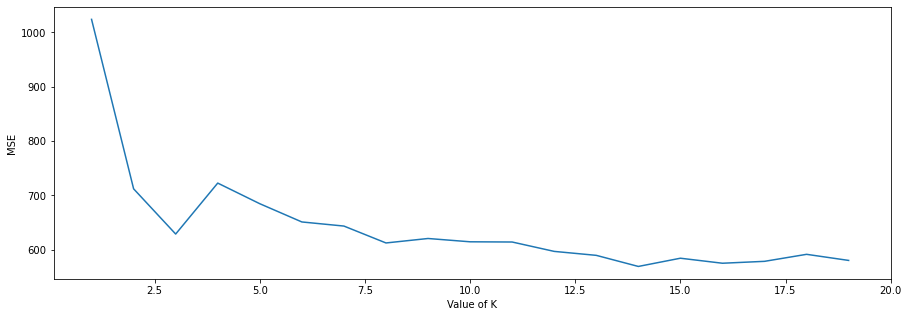

In [79]:
plt.figure(figsize = (15,5))
plt.plot(range(1,20),mse)
plt.xlim(right = 20)
plt.xlabel("Value of K")
plt.ylabel("MSE")
plt.show()

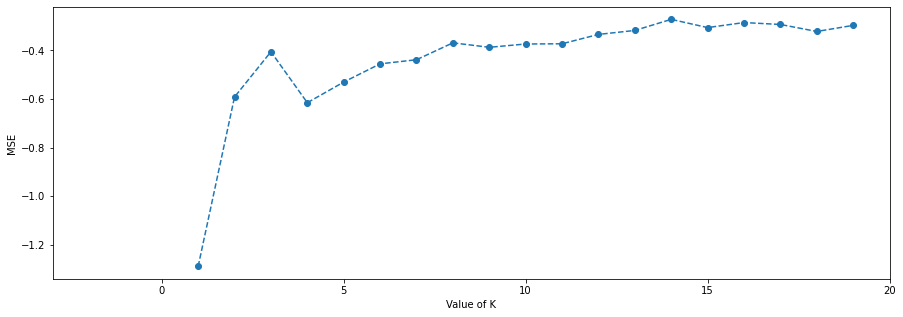

In [80]:
plt.figure(figsize = (15,5))
plt.plot(range(1,20),r2Score,linestyle = 'dashed',marker = 'o')
plt.xlim(-3,20)
#plt.xlim(left = 1)
plt.xlabel("Value of K")
plt.ylabel("MSE")
plt.show()